# Running Simulations in Python

<img src='images/artistic-illustration-of-simulation-theory.jpeg' width=75%>

> <a href='https://www.unrevealedfiles.com/is-the-universe-a-computer-simulation/'>*Img Source*</a>

## Why run simulations?
#### "Hard" calculation vs *Monte Carlo*.
> ***Monte Carlo methods***, *or **Monte Carlo experiments**, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results.*
>
> *The underlying concept is **to use randomness to solve problems that might be deterministic in principle**.*
>
> *They are often used in physical and mathematical problems and are most useful **when it is difficult or impossible to use other approaches**.* 
>
> *Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.*
>
> <a href='https://en.wikipedia.org/wiki/Monte_Carlo_method'>*Monte Carlo - Wiki*</a>

---

*"Solving" for $\large \pi$!*

<img src='images/Pi_30K.gif'>

> *By nicoguaro - Own work, CC BY 3.0, https://commons.wikimedia.org/w/index.php?curid=14609430*

#### Creation of "Event Space".
- Games are a great place to start!
    - Rules, limitations, confinement.
- Used in Reinforcement Learning.
    

#### Take a simple task and repeat it indefinitely.


#### Acquire synthetic data and make concrete decisions.

## What does it mean to run a simulation?
- Non-visual simulation where only the parameters and results are relevant.

# Building a Simulation - *Risk*

<img src='images/risk.jpeg'>

> *Risk board game. CREDIT: Alamy*

## *What is Risk?*

#### Rules / Object
- Risk is a game of **world domination!**


- The object is ***to conquer the world by occupying all territories on the board.*** *You need to eliminate all your opponents.*

### What are we going to simulate?
- Two armies, of size `n, m` respectively, are battling - `A`: attacker, `D`: defender.
    - Attacker rolls up to 3 dice, Defender rolls up to 2 dice.
    
    
- The highest dice are compared, then the second-highest dice are compared (if necessary).
    - ***Tie goes to the defender.***
    
    
- Armies are removed based on results.
    
<img src='images/battle.jpeg'>

> <a href='https://www.ultraboardgames.com/risk/game-rules.php'>*Official Rules*</a>

#### What can we learn from running this simulation?
- Our goal today is to see which matters more: ***the attacker rolling an extra die*** or ***the defender winning on a tie***.

---

# Simulating!
## Rolling a Die

In [1]:
import numpy as np                # For randomness and calculations.
import pandas as pd               # Representing data in tables.
import matplotlib.pyplot as plt   # For plotting.

plt.style.use('seaborn-poster')   # Set plot style.
np.random.seed(51)                # Setting a random "seed" for reproducibility.

In [2]:
# Ask numpy to choose a random value from the integers 1-6.
np.random.choice(range(1,6+1))

2

In [3]:
# Run the above 10 times!
for _ in range(10):
    print(np.random.choice(range(1,6+1)))

6
1
2
6
1
6
5
2
6
3


In [4]:
# A function so we don't have to copy and paste code!
def roll_die():
    """Returns a value of a fair-die."""
    
    return np.random.choice(range(1,6+1))

### Simulate One Roll

In [5]:
# Roll a die once!
my_roll = roll_die()

print(f"I rolled a __{my_roll}__ with my simulated die! I'm the best!")

I rolled a __6__ with my simulated die! I'm the best!


### Simulate Many Rolls

[Text(0.5, 1.0, 'Roll Frequency'),
 Text(0.5, 0, 'Result'),
 Text(0, 0.5, 'Count')]

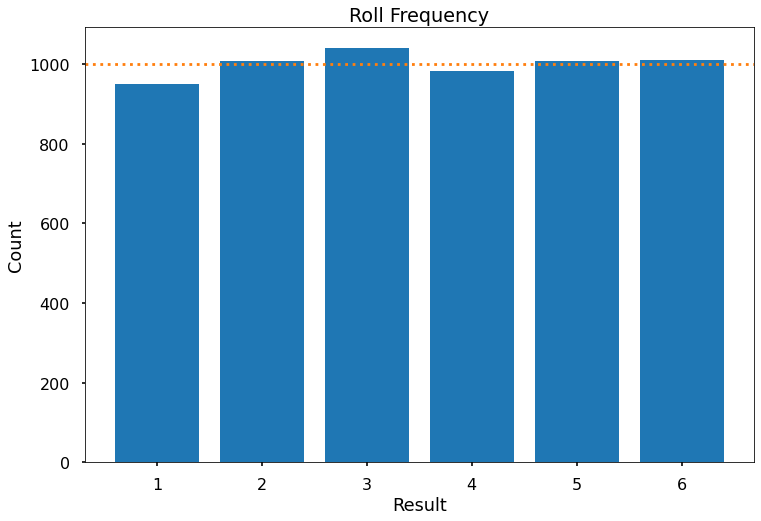

In [6]:
# Roll a die 6,000 times!!
N_ROLLS = 6_000

# Track the results of each roll.
num_freq = {}
for _ in range(N_ROLLS): # Do the loop `N_ROLLS` times.
    value = roll_die()   # Roll a die.
    num_freq[value] = num_freq.get(value, 0) + 1 # Add 1 to the count for the roll.

# Plot the results!
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(
    x=range(1, 6+1), 
    height=[y for x, y in 
            sorted(list(num_freq.items()), 
                   key=lambda x: x[0])],
    color='tab:blue'
)
ax.axhline(y=N_ROLLS//6, color='tab:orange', ls=':')
ax.set(title='Roll Frequency', xlabel='Result', ylabel='Count')

### Formatting Dice Rolls
*We need to create a system for how our rolls are going to look.*


- *Since we have to roll **multiple dice** for both the attacker and defender, we need a function to return a **list of numbers** representing all the rolls together!*
     
     
- *The number of dice depends on the side and the number of armies on the side.*

In [7]:
# Format for attacker.
def roll_attacker(n_armies):
    """
    Returns a list of **sorted** dice rolls for the attacker.
    
    Parameters:
    -----------
    n_armies (int): 
        Number of armies that the attacking side has.
        The number of dice will be equal to the number of armies (max 3).
        
    Returns:
    --------
    List of dice rolls (integers).
    """
    
    # If there are no armies, there will be no rolls!
    if not n_armies:
        return []
    
    # Number of dice should be whatever's smaller: 3 or n_armies.
    n_dice = min(3, n_armies)
    
    # Roll the dice!
    rolls = sorted([roll_die() for _ in range(n_dice)], reverse=True)
    
    return rolls

In [8]:
# Let's test what it looks like if the attacker has 5 armies!
sample_attack = roll_attacker(5)
sample_attack

[3, 2, 1]

In [9]:
# Format for defender.
def roll_defender(n_armies):
    """
    Returns a list of **sorted** dice rolls for the defender.
    
    Parameters:
    -----------
    n_armies (int): 
        Number of armies that the attacking side has.
        The number of dice will be equal to the number of armies (max 2).
        
    Returns:
    --------
    List of dice rolls (integers).
    """
    
    # If there are no armies, there will be no rolls!
    if not n_armies:
        return []
    
    # Number of dice should be whatever's smaller: 2 or n_armies.
    n_dice = min(2, n_armies)
    
    # Roll the dice!
    rolls = sorted([roll_die() for _ in range(n_dice)], reverse=True)
    
    return rolls

In [10]:
# Let's test what it looks like if the defender has 5 armies!
sample_defense = roll_defender(5)
sample_defense

[6, 5]

## Comparing Dice Rolls

- *We need to compare the rolls and find out how many armies are lost in a given roll.*

In [11]:
def compare_rolls(attacker_roll, defender_roll):
    """
    Returns number of armies to remove fom each side in the form of:
        `(attacker_loss, defender_loss)`
    """
    
    # Set up - each side begins without losing any armies.
    attacker_loss = 0
    defender_loss = 0
    
    # Combine rolls to compare (highest -> highest, second-highest -> second-highest, etc)
    zipped_rolls = zip(attacker_roll, defender_roll) 
    
    # Compare dice rolls one at a time.
    for attack, defense in zipped_rolls:
        if attack > defense: # Attack must be greater than, not equal to!
            defender_loss += 1
        else:
            attacker_loss += 1
        
    return attacker_loss, defender_loss

In [12]:
# Show the sample from before.
print(f'Attack:  {sample_attack}\nDefense: {sample_defense}\n')

# Utilize the `compare` function.
sample_a_loss, sample_d_loss = compare_rolls(sample_attack, sample_defense)

# Print the results as a sanity check.
print(f'Attacker losses: {sample_a_loss}\nDefender losses: {sample_d_loss}')

Attack:  [3, 2, 1]
Defense: [6, 5]

Attacker losses: 2
Defender losses: 0


## Putting it *On The Board*

In [13]:
# How many armies does each side have?
ATTACKING_ARMIES = 5
DEFENDING_ARMIES = 5
RND = 1 # This is to track the progress if the dice are rolled multiple times.

# Run the loop while until one side has no armies remaining!
while ATTACKING_ARMIES and DEFENDING_ARMIES:
    # Display update.
    print(f'Roll #{RND}')
    print(f'\tAttacker Count: {ATTACKING_ARMIES}')
    print(f'\tDefender Count: {DEFENDING_ARMIES}')
    print('\t-----')
    
    # Roll the dice for each side.
    attack = roll_attacker(ATTACKING_ARMIES)
    defense = roll_defender(DEFENDING_ARMIES)
    
    # Compare the rolls.
    a_loss, d_loss = compare_rolls(attack, defense)
    
    # Subtract the losses.
    ATTACKING_ARMIES -= a_loss
    DEFENDING_ARMIES -= d_loss
    
    # Display update.
    print(f'\tAttacker Roll: {attack}\n\tDefender Roll: {defense}')
    print(f'\tAttacker Loses {a_loss}. Defender Loses {d_loss}')
    
    # Advance the round.
    RND += 1
    
print('FINAL RESULTS')
print(f'Attacker has {ATTACKING_ARMIES} remaining!')
print(f'Defender has {DEFENDING_ARMIES} remianing!')

Roll #1
	Attacker Count: 5
	Defender Count: 5
	-----
	Attacker Roll: [6, 4, 2]
	Defender Roll: [4, 1]
	Attacker Loses 0. Defender Loses 2
Roll #2
	Attacker Count: 5
	Defender Count: 3
	-----
	Attacker Roll: [6, 3, 3]
	Defender Roll: [6, 2]
	Attacker Loses 1. Defender Loses 1
Roll #3
	Attacker Count: 4
	Defender Count: 2
	-----
	Attacker Roll: [6, 6, 3]
	Defender Roll: [5, 1]
	Attacker Loses 0. Defender Loses 2
FINAL RESULTS
Attacker has 4 remaining!
Defender has 0 remianing!


### Functionalizing a Skirmish

*We are now going to simply put that code into a function so we can use it many times without copying / pasting the code!*

In [14]:
def run_simulation(ATTACKING_ARMIES, DEFENDING_ARMIES, verbose=False):
    """
    Run a simulation where the armies roll off until one is eliminated.
    Return the win margin from the perspective of the Attacker.
        `ATTACKING_ARMIES - DEFENDING_ARMIES`
    """
    
    RND = 1
    while ATTACKING_ARMIES and DEFENDING_ARMIES:
        # Display update.
        if verbose:
            print(f'#{RND}')
            print(f'\tAttacker Count: {ATTACKING_ARMIES}')
            print(f'\tDefender Count: {DEFENDING_ARMIES}')
            print('\t-----')

        # Roll the dice.
        attack = roll_attacker(ATTACKING_ARMIES)
        defense = roll_defender(DEFENDING_ARMIES)

        # Compare the rolls.
        a_loss, d_loss = compare_rolls(attack, defense)

        # Subtract the losses.
        ATTACKING_ARMIES -= a_loss
        DEFENDING_ARMIES -= d_loss

        # Display update.
        if verbose:
            print(f'\tAttacker Roll: {attack}\n\tDefender Roll: {defense}')
            print(f'\tAttacker Loses {a_loss}. Defender Loses {d_loss}')

        # Advance the round.
        RND += 1
    if verbose:
        print('FINAL RESULTS')
        print(f'Attacker has {ATTACKING_ARMIES} remaining!')
        print(f'Defender has {DEFENDING_ARMIES} remianing!')
    return ATTACKING_ARMIES - DEFENDING_ARMIES

In [15]:
# Test the function!
run_simulation(5, 5)

4

*What does this value mean? How do we interpret this result?*

#### Test - Army A vs Army B

In [16]:
# Run 1000 simulations.
two_v_two_results = [run_simulation(2, 2) for _ in range(1000)]

> *Explanation of above code:*
> ```python
> [run_simulation(2, 2) ... for _ in range(1000)]
>  # DO THIS THING          # THIS MANY TIMES
> ```

In [17]:
# Look at the first 10 results.
two_v_two_results[:10]

[-2, -1, -2, -2, 2, -2, -2, -2, -2, -1]

In [18]:
# Count the results!
results_count = (
    pd.Series(two_v_two_results, name='count')
    .value_counts()
    .reset_index()
    .sort_values('index')
)
results_count

,index,count
0,-2,435
2,-1,179
3,1,162
1,2,224


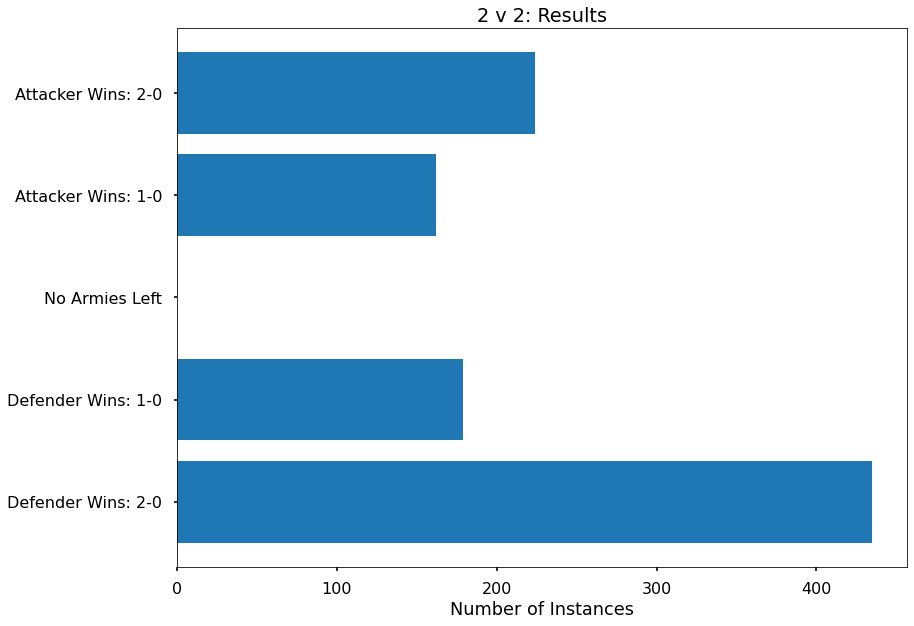

In [19]:
# Plot the results!
fig, ax = plt.subplots()
ax.barh(results_count['index'], results_count['count'])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_yticklabels(['Defender Wins: 2-0', 'Defender Wins: 1-0', 
                    'No Armies Left', 
                    'Attacker Wins: 1-0', 'Attacker Wins: 2-0'])
ax.set(title='2 v 2: Results', xlabel='Number of Instances')
fig.tight_layout()

In [20]:
# Find the mean of all the results!
two_v_2_mean = np.mean(two_v_two_results)
two_v_2_mean

-0.439

*We can interpret this result!*
> ***When an army of size 2 fights another army of size 2, the defender is expected to win by a margin of 0.439 units.***

#### Function - Normalize Results
- *Typically, **it's normal to normalize** our results in order to best compare one simulation to another.*


- *We have a figure above which shows a margin of victory as a **raw count**.*


- *In order to compare a 2v2 battle to a larger battle, we should normalize the results.*
    - *The normalized results should be **proportionate to the starting army sizes**.*

In [21]:
def normalized_mean(army_size, n_simulations):
    """
    Returns a scaled mean-result of the remaining army sizes.
        A value of `1` is best for the attacker.
            (means the attacker won without losing an army)
        A value of `-1` is best for the defender.
            (means the defender won without losing an army)
        The closer to 0, the more balanced the result is.
    """
    
    # Run simulations.
    results = [run_simulation(army_size, army_size) 
                for _ in range(n_simulations)]
    
    # Find mean.
    mean_results = np.mean(results)
    
    # Normalized mean - proportionate to the starting army sizes!
    normalized_mean = mean_results / army_size
    
    return normalized_mean

*Look at the normalized results for a 2v2!*

In [22]:
# Do a quick comparison with the normalized results!
norm_results = [run_simulation(2, 2) / 2 # Divide by the number of armies!
                for _ in range(1000)]

# Get count of each result.
norm_results_count = (
    pd.Series(norm_results, name='count')
    .value_counts()
    .reset_index()
    .sort_values('index')
)
norm_results_count

,index,count
0,-1.0,433
1,-0.5,207
3,0.5,156
2,1.0,204


<BarContainer object of 4 artists>

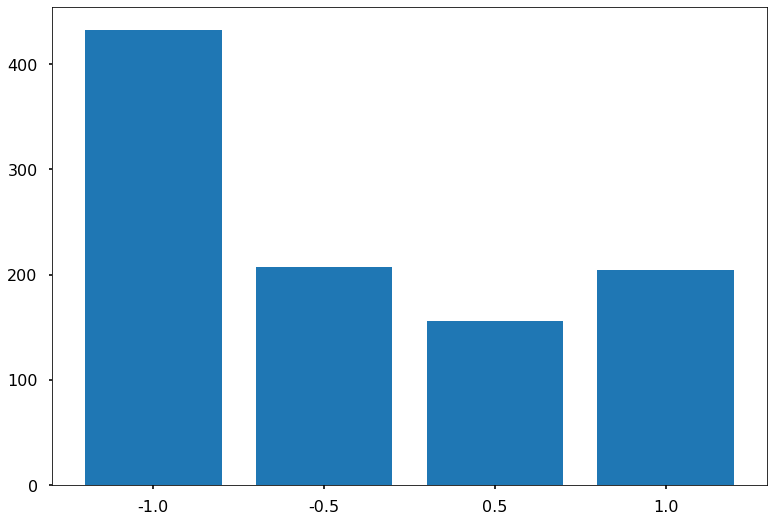

In [23]:
# Quick plot to compare above!
fig, ax = plt.subplots()
ax.bar(norm_results_count['index'].astype(str), norm_results_count['count'])

---

# Questions

## What is the average result with army sizes of:

In [24]:
# Setting up a variable - number of simulations.
N_SIMULATIONS = 1000

### 1 vs 1

In [25]:
one = normalized_mean(1, N_SIMULATIONS)
one

-0.172

### 2 vs 2

In [26]:
two = normalized_mean(2, N_SIMULATIONS)
two

-0.251

### 3 vs 3

In [27]:
three = normalized_mean(3, N_SIMULATIONS)
three

-0.06033333333333333

### 4 vs 4

In [28]:
four = normalized_mean(4, N_SIMULATIONS)
four

-0.03575

### 5 vs 5

In [29]:
five = normalized_mean(5, N_SIMULATIONS)
five

0.020999999999999998

### Plot Results Thusfar

[Text(0.5, 1.0, 'Relative Margin of Victory'),
 Text(0, 0.5, 'Winning Margin'),
 Text(0.5, 0, 'Army Size')]

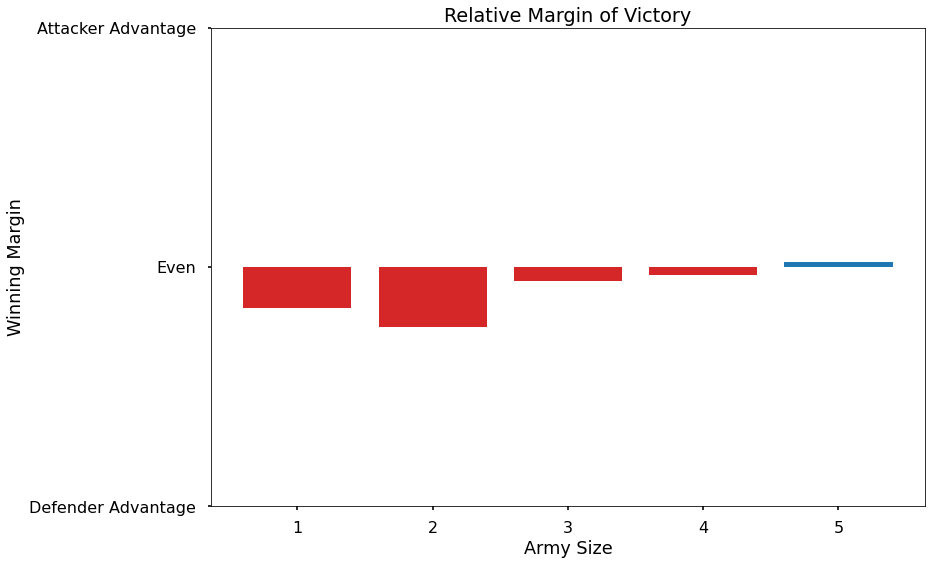

In [30]:
fig, ax = plt.subplots()
x_vals = range(1, 5+1)
y_vals = [one, two, three, four, five]
colors = ['tab:red' if y < 0 else 'tab:blue' for y in y_vals]

ax.bar(x=x_vals, 
       height=y_vals,
       color=colors)

ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(['Defender Advantage', 'Even', 'Attacker Advantage'])
ax.set_xticks(x_vals)
ax.set_ylim(-1, 1)
ax.set(title='Relative Margin of Victory',
       ylabel='Winning Margin',
       xlabel='Army Size')

In [31]:
# Functionalize the above code.
def plot_results_for_n_simulations(army_sizes, n_simulations=1_000):
    """
    Run `n_simulations` and plot the relative winning margins for each 
    army size in the given `army_sizes`.
    """
    
    with plt.style.context('seaborn-talk'):
        fig, ax = plt.subplots()
        x_vals = army_sizes
        y_vals = [normalized_mean(size, n_simulations) for size in army_sizes]
        colors = ['tab:red' if y < 0 else 'tab:blue' for y in y_vals]
        ax.bar(x=x_vals,
               height=y_vals,
               color=colors)

        ax.set_yticks([-1, 0, 1])
        ax.set_yticklabels(['Defender Advantage', 'Even', 'Attacker Advantage'])
        ax.set_xticks(x_vals)
        ax.set_ylim(-1, 1)
        ax.set(title='Relative Margin of Victory',
               ylabel='Winning Margin',
               xlabel='Army Size')
        fig.tight_layout()
        plt.show()

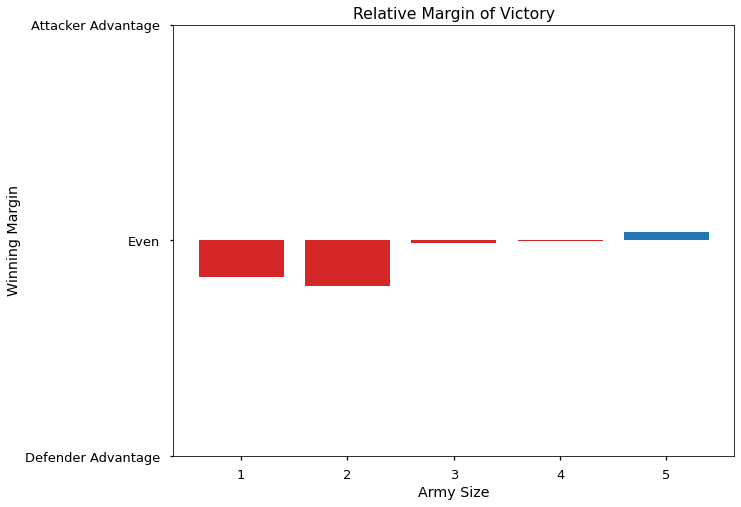

In [32]:
# Testing to compare against above.
plot_results_for_n_simulations([1, 2, 3, 4, 5])

# A Large-Scale Simulation

*Let's put it all together!*
1. Go through army-sizes from 1 through 20.
2. Run 1,000 simulations where armies do battle!
3. Record the average, standardized results for those simulations.
4. Plot the results to compare!

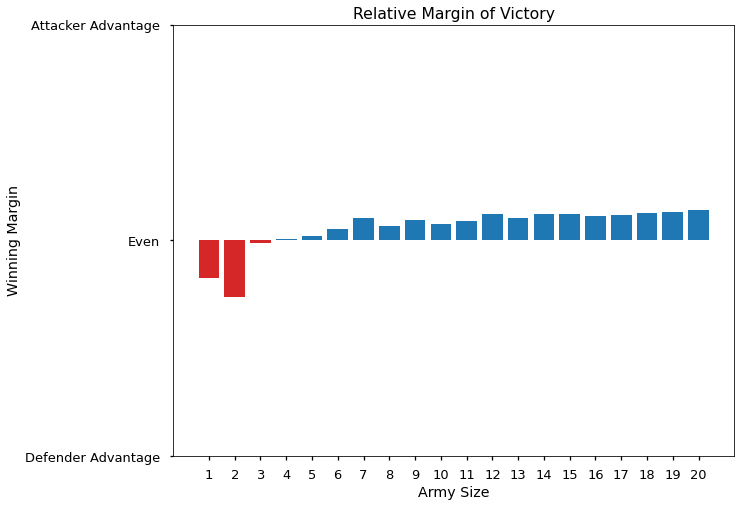

In [33]:
plot_results_for_n_simulations(range(1, 21))

# Congrats!

<img src='images/celebrate.jpeg' width=50%>

***We've managed to build a pretty substantial simulation from the ground up!***

We:
1. Simulated rolling a die!
2. Simulated rolling dice for an "attacker" and "defender"!
3. Compared an "attacker roll" to a "defender roll".
    - *Used this to determine how many armies should be removed.*
4. Simulated a "battle" from start to finish - until one side was eliminated - and tracked results!
5. Normalized our results to be able to compare the **margin of victory** for armies of different sizes.